# Logstic Regression course

In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston', version=1, as_frame=True, return_X_y=False, parser='pandas')

In [2]:
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']

In [3]:
print(np.percentile(price, 66))
greater_then_most = np.percentile(price, 66)

23.53


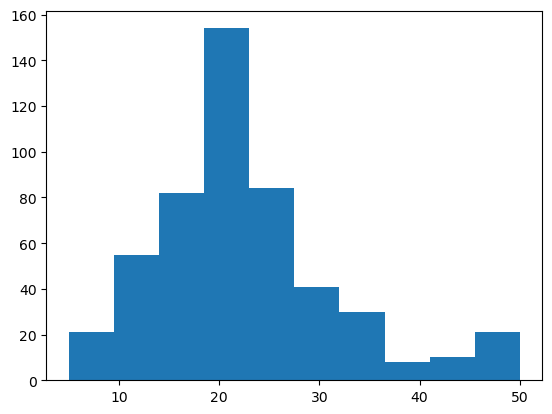

In [4]:
plt.hist(price)
plt.show()

In [5]:
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
expensive = dataframe['expensive']

# print(dataframe.head())
print(dataframe['expensive'])

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    1
504    0
505    0
Name: expensive, Length: 506, dtype: int64


In [9]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return logistic(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return np.sum((yhat - y))

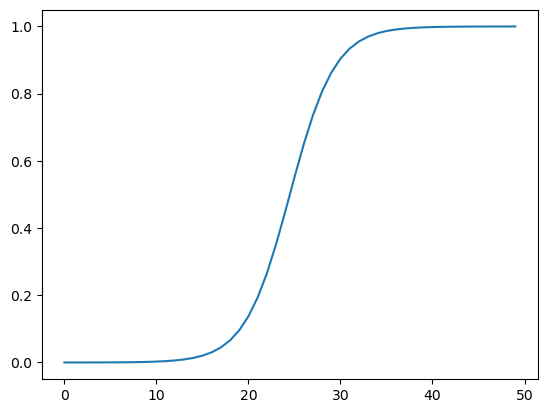

In [10]:
import matplotlib.pyplot as plt
plt.plot(logistic(np.linspace(-10, 10)))
plt.show()

In [11]:
w = np.random.random_sample((1, 2))
b = 0

In [14]:
learning_rate = 1e-5
epoch = 200
losses = []

history_k_b_loss = []

for i in range(epoch):
    batch_loss = []
    for batch in range(len(rm)):
        index = random.choice(range(len(rm)))

        x = np.array([rm[index], lstat[index]])
        y = expensive[index]

        yhat = model(x, w, b)
        loss_v = loss(yhat, y)

        w = w + -1 * partial_w(x, y, yhat) * learning_rate
        b = b + -1 * partial_b(x, y, yhat) * learning_rate

        batch_loss.append(loss_v)
        history_k_b_loss.append((w, b, loss_v))

        if batch % 100 == 0:
            print('Epoch: {}, Batch: {}, loss:{}'.format(i, batch, loss_v))
    losses.append(np.mean(batch_loss))

Epoch: 0, Batch: 0, loss:1.58643875835581
Epoch: 0, Batch: 100, loss:0.006480916376429105
Epoch: 0, Batch: 200, loss:0.0002954115126215995
Epoch: 0, Batch: 300, loss:0.9994208736965742
Epoch: 0, Batch: 400, loss:0.014460763671700325
Epoch: 0, Batch: 500, loss:0.04720347339909906
Epoch: 1, Batch: 0, loss:0.38673394928468463
Epoch: 1, Batch: 100, loss:0.3333414877842738
Epoch: 1, Batch: 200, loss:0.020565538375687562
Epoch: 1, Batch: 300, loss:0.28043317673236806
Epoch: 1, Batch: 400, loss:0.12695674219999903
Epoch: 1, Batch: 500, loss:0.20191152651189664
Epoch: 2, Batch: 0, loss:0.6007593661421398
Epoch: 2, Batch: 100, loss:0.005052108598454767
Epoch: 2, Batch: 200, loss:0.8934650208671954
Epoch: 2, Batch: 300, loss:0.006401721728616935
Epoch: 2, Batch: 400, loss:0.0824663399902337
Epoch: 2, Batch: 500, loss:0.5715616957952867
Epoch: 3, Batch: 0, loss:0.12713389206394896
Epoch: 3, Batch: 100, loss:0.2933909729908157
Epoch: 3, Batch: 200, loss:0.4822325729462486
Epoch: 3, Batch: 300, los

[0.3144275010245194,
 0.3484577860932554,
 0.35986649599862325,
 0.366686085315617,
 0.32837050487483155,
 0.3340613964972217,
 0.32900350410137014,
 0.32712512499873847,
 0.37377914773961335,
 0.3308634773354132,
 0.33569395176491157,
 0.2952890690418254,
 0.3244454520920616,
 0.3253671087211159,
 0.34410290753835576,
 0.3067212714973092,
 0.32827789996791384,
 0.3314813954147692,
 0.32459143646001726,
 0.34819853360810177,
 0.3551172068712137,
 0.32177474371184195,
 0.3287212348499873,
 0.40038327007050106,
 0.3466109094187856,
 0.3371395038731384,
 0.32271683336380047,
 0.338485453778926,
 0.3123452241707842,
 0.3133591468355737,
 0.3122943992253592,
 0.32211893852666335,
 0.4252408684209153,
 0.3826606461606883,
 0.3574122343110743,
 0.3266715590105464,
 0.34079709006873854,
 0.35037412268059875,
 0.3449624636791642,
 0.3559533328491573,
 0.3017415370590419,
 0.3453595268681302,
 0.316784745355212,
 0.3434639670105853,
 0.3218704391628107,
 0.3162554244126696,
 0.3318650295003404,


In [11]:
random_test_indices = np.random.choice(range(len(rm)), size=100)
decision_boundary = 0.5



for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], expensive[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM:{}, LSTAT:{}, EXPENSIVE:{}, Predicated:{}'.format(x1, x2, y, predicate_label))

boston_labels = np.array

RM:6.595, LSTAT:4.32, EXPENSIVE:1, Predicated:1
RM:6.968, LSTAT:17.21, EXPENSIVE:0, Predicated:0
RM:8.266, LSTAT:4.14, EXPENSIVE:1, Predicated:1
RM:5.531, LSTAT:27.38, EXPENSIVE:0, Predicated:0
RM:6.63, LSTAT:4.7, EXPENSIVE:1, Predicated:1
RM:5.093, LSTAT:29.68, EXPENSIVE:0, Predicated:0
RM:5.155, LSTAT:20.08, EXPENSIVE:0, Predicated:0
RM:6.98, LSTAT:11.66, EXPENSIVE:1, Predicated:0
RM:6.069, LSTAT:9.55, EXPENSIVE:0, Predicated:0
RM:6.333, LSTAT:7.34, EXPENSIVE:0, Predicated:1
RM:6.395, LSTAT:13.27, EXPENSIVE:0, Predicated:0
RM:6.144, LSTAT:9.45, EXPENSIVE:1, Predicated:0
RM:5.888, LSTAT:14.8, EXPENSIVE:0, Predicated:0
RM:6.631, LSTAT:9.54, EXPENSIVE:1, Predicated:0
RM:5.39, LSTAT:20.85, EXPENSIVE:0, Predicated:0
RM:5.57, LSTAT:21.02, EXPENSIVE:0, Predicated:0
RM:4.97, LSTAT:3.26, EXPENSIVE:1, Predicated:1
RM:4.368, LSTAT:30.63, EXPENSIVE:0, Predicated:0
RM:4.926, LSTAT:29.53, EXPENSIVE:0, Predicated:0
RM:6.762, LSTAT:9.5, EXPENSIVE:1, Predicated:0
RM:5.707, LSTAT:12.01, EXPENSIVE:0, P

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_18549/1902039918.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicate_label = int(predicate > decision_boundary)


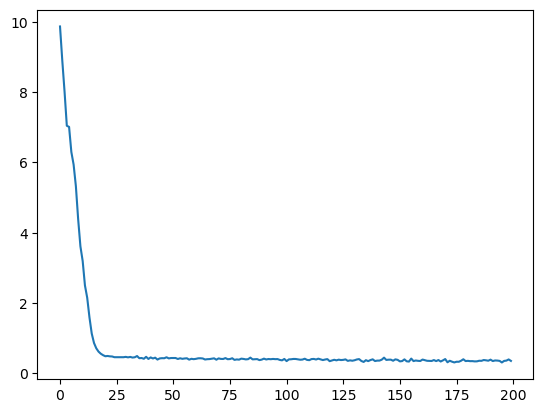

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(losses)

In [19]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.8, 0.7, 0.8, 0.3, 0.8])

In [20]:
def test_lose(y, yhat):
    return -np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))

In [21]:
test_lose(true_label, predicate_1)

2.2300784022072975

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)